### Load Data

In [10]:
import pandas as pd
df = pd.read_csv('./data/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


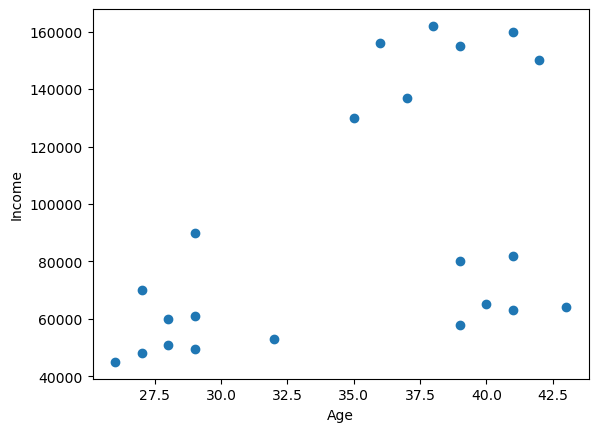

In [11]:
import matplotlib.pyplot as plt
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(df['Age'],df['Income($)'])

### Model creation

In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

In [12]:
y_pred = model.fit_predict(df[['Age','Income($)']])
y_pred

/Users/chandimajayamina/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [13]:
df['Pred'] = y_pred
df.head()

,Name,Age,Income($),Pred
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


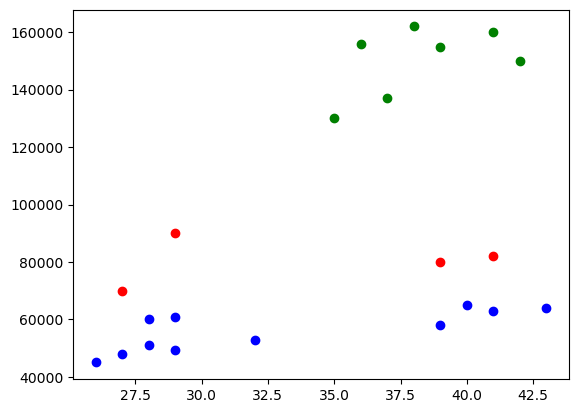

In [14]:
df0 = df[df.Pred==0]
df1 = df[df.Pred==1]
df2 = df[df.Pred==2]
plt.scatter(df0['Age'],df0['Income($)'], color='r')
plt.scatter(df1['Age'],df1['Income($)'], color='g')
plt.scatter(df2['Age'],df2['Income($)'], color='b')

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Name,Age,Income($),Pred
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [27]:
df['Pred'] = model.fit_predict(df[['Age','Income($)']])
df.head()

,Name,Age,Income($),Pred
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


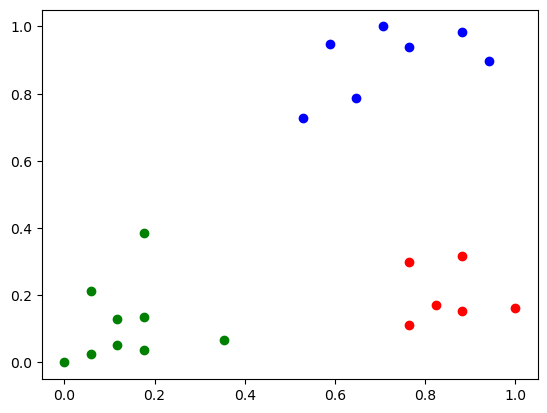

In [19]:
df0 = df[df.Pred==0]
df1 = df[df.Pred==1]
df2 = df[df.Pred==2]
plt.scatter(df0['Age'],df0['Income($)'], color='r')
plt.scatter(df1['Age'],df1['Income($)'], color='g')
plt.scatter(df2['Age'],df2['Income($)'], color='b')

## Elbow for K means

In [29]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse


[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2766936276300279,
 0.21066678488010526,
 0.17299621932455467,
 0.1397684499538816,
 0.10188787724979426]

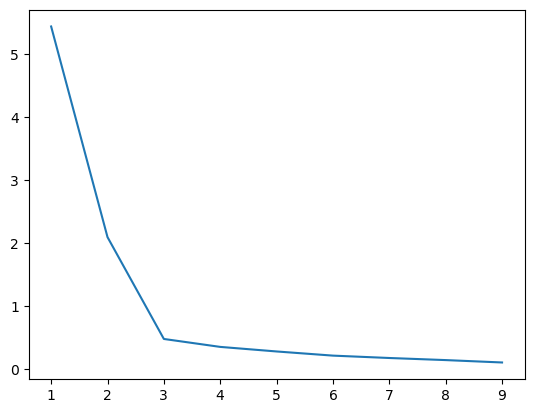

In [30]:
plt.plot(k_rng,sse)